In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle_api_credentials/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

Mounted at /content/drive
rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                        Data Science Job Salaries                            7KB  2022-06-15 08:59:12           8202        274  1.0              
surajjha101/bigbasket-entire-product-list-28k-datapoints  BigBasket Entire Product List (~28K datapoints)      6MB  2022-06-22 12:51:18           2898        116  1.0              
victorsoeiro/netflix-tv-shows-and-movies                  Netflix TV Shows and Movies                          2MB  2022-05-15 00:01:23          17821        508  1.0              
sameepva

In [ ]:
! kaggle datasets download prithwirajmitra/covid-face-mask-detection-dataset

 95% 197M/207M [00:01<00:00, 168MB/s]
100% 207M/207M [00:01<00:00, 171MB/s]


In [ ]:
! unzip -q covid-face-mask-detection-dataset.zip

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [3]:
main_dir = '/content/New Masks Dataset'

train_dir = os.path.join(main_dir, 'Train')
test_dir = os.path.join(main_dir, 'Test')
val_dir = os.path.join(main_dir, 'Validation')

train_mask_dir = os.path.join(train_dir, 'Mask')
train_nomask_dir = os.path.join(train_dir, 'Non Mask')

In [4]:
train_mask_names = os.listdir(train_mask_dir)
train_nomask_names = os.listdir(train_nomask_dir)

print(train_mask_names[:10])
print(train_nomask_names[:10])

['1520.jpg', '1556.jpg', '1456.jpg', '1490.jpg', '1110.jpg', '0367.png', '0486.jpg', '0770.jpg', '0943.jpg', '1383.jpg']
['47.jpg', '261.jpg', '217.jpg', '224.jpg', '234.jpg', '181.jpg', '12.jpg', '26.jpg', '153.jpg', '255.jpg']


['/content/New Masks Dataset/Train/Mask/1520.jpg', '/content/New Masks Dataset/Train/Mask/1556.jpg', '/content/New Masks Dataset/Train/Mask/1456.jpg', '/content/New Masks Dataset/Train/Mask/1490.jpg', '/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/0367.png', '/content/New Masks Dataset/Train/Mask/0486.jpg', '/content/New Masks Dataset/Train/Mask/0770.jpg']
['/content/New Masks Dataset/Train/Non Mask/47.jpg', '/content/New Masks Dataset/Train/Non Mask/261.jpg', '/content/New Masks Dataset/Train/Non Mask/217.jpg', '/content/New Masks Dataset/Train/Non Mask/224.jpg', '/content/New Masks Dataset/Train/Non Mask/234.jpg', '/content/New Masks Dataset/Train/Non Mask/181.jpg', '/content/New Masks Dataset/Train/Non Mask/12.jpg', '/content/New Masks Dataset/Train/Non Mask/26.jpg']


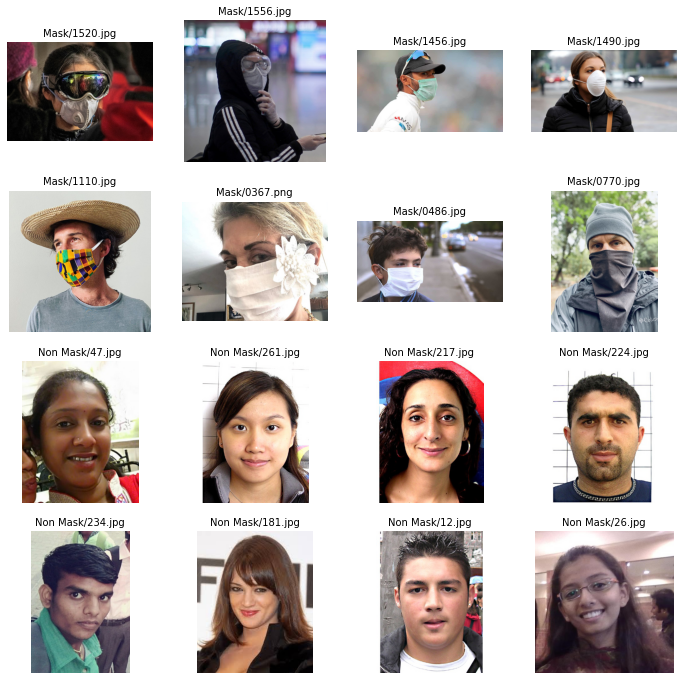

In [5]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir, i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir, i))

print(mask_pic)
print(nomask_pic)

merged_pics = mask_pic + nomask_pic

for i in range(0, len(merged_pics)):
  data = merged_pics[i].split('/',4)[4]
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data, fontsize=10)
  plt.imshow(image, cmap='gray')

plt.show()

In [6]:
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    rotation_range = 40,
    horizontal_flip = True,
)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
)

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [8]:
train_generator.image_shape

(150, 150, 3)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'SAME', activation = 'relu', input_shape = (150,150,3),))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3), padding = 'SAME', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer = Adam(lr=0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')],
    # metrics = ['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
history = model.fit(
    train_generator,
    epochs = 30,
    validation_data = val_generator,
)

Epoch 1/30
19/19 [==============================] - 16s 680ms/step - loss: 2.4665 - accuracy: 0.5467 - precision: 0.5565 - recall: 0.4600 - val_loss: 0.6923 - val_accuracy: 0.5882 - val_precision: 0.5525 - val_recall: 0.9281
Epoch 2/30
19/19 [==============================] - 12s 634ms/step - loss: 0.5776 - accuracy: 0.7517 - precision: 0.7525 - recall: 0.7500 - val_loss: 0.5927 - val_accuracy: 0.8007 - val_precision: 0.7233 - val_recall: 0.9739
Epoch 3/30
19/19 [==============================] - 12s 630ms/step - loss: 0.3982 - accuracy: 0.8433 - precision: 0.8456 - recall: 0.8400 - val_loss: 0.4811 - val_accuracy: 0.8366 - val_precision: 0.7696 - val_recall: 0.9608
Epoch 4/30
19/19 [==============================] - 12s 634ms/step - loss: 0.3472 - accuracy: 0.8567 - precision: 0.8429 - recall: 0.8767 - val_loss: 0.3328 - val_accuracy: 0.9314 - val_precision: 0.9024 - val_recall: 0.9673
Epoch 5/30
19/19 [==============================] - 12s 639ms/step - loss: 0.2838 - accuracy: 0.9000

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

Text(0.5, 0, 'epoch')

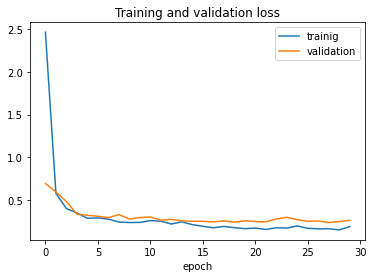

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

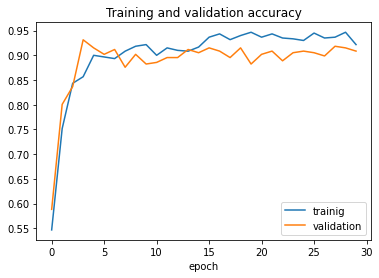

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

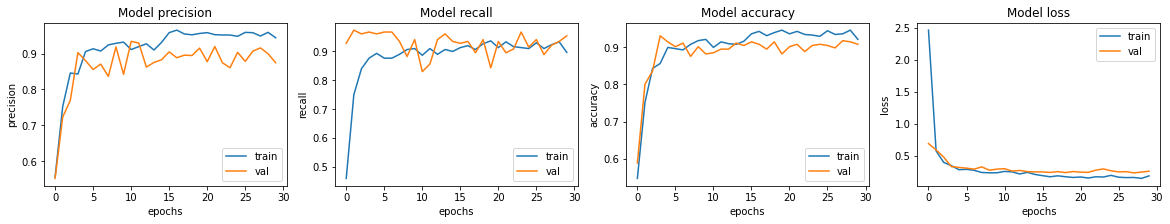

In [15]:
# interpreting the metrics
fig, ax = plt.subplots(1, 4, figsize=(20,3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
  ax[i].plot(history.history[met])
  ax[i].plot(history.history['val_' + met])
  ax[i].set_title(f'Model {met}')
  ax[i].set_xlabel('epochs')
  ax[i].set_ylabel(met)
  ax[i].legend(['train', 'val'])

In [16]:
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_generator)
print("Testing Accuracy: ", test_acc)
print("Testing Precision: ", test_prec)
print("Testing Recall: ", test_rec)
print("Testing Loss: ", test_loss)

4/4 [==============================] - 1s 262ms/step - loss: 0.2336 - accuracy: 0.8800 - precision: 0.8393 - recall: 0.9400
Testing Accuracy:  0.8799999952316284
Testing Precision:  0.8392857313156128
Testing Recall:  0.9399999976158142
Testing Loss:  0.2335958033800125


In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/' + fname
  img = image.load_img(img_path, target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving mask1.webp to mask1.webp
Saving mask2.webp to mask2.webp
Saving nomask1.jpeg to nomask1.jpeg
Saving nomask2.jpg to nomask2.jpg
Saving mask1.jpg to mask1.jpg
mask1.webp
mask
mask2.webp
mask
nomask1.jpeg
nomask
nomask2.jpg
mask
mask1.jpg
mask


In [18]:
model.save('model.h5')